In [300]:
import numpy as np
import math
from scipy.stats import norm
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

In [301]:
S0 = 100                              # Initial stock price
K = 95                                # Strike price for conversion
T = 0.5                               # Time to maturity (in years)
r = b = 0.01                          # Risk-free rate
sigma = 0.20                          # Volatility 

In [302]:
def black_scholes(S, b, r, T, sigma, K, option_type = 'call'):
    d1 = (np.log(S/K)+(b+(sigma**2/2)*T))/(sigma*np.sqrt(T))
    d2 = d1 - (sigma * np.sqrt(T))
    if option_type == 'call':
        BSM = S*np.exp((b-r)*T) * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
        #print(BSM_call)
    elif option_type == 'put':
        BSM = K * np.exp(-r*T) * norm.cdf(-d2) - S * np.exp((b-r)*T) * norm.cdf(-d1)
        #print(BSM_put)
    return BSM

In [303]:
black_scholes(S0, b, r, T, sigma, K, option_type = 'call')

8.644565255127482

In [304]:
# Black-Scholes-Merton formula
d1 = (math.log(S0 / K) + (r + sigma**2 / 2) * T) / (sigma * math.sqrt(T))
d2 = d1 - sigma * math.sqrt(T)

# Calculate Call and Put option prices
Call = S0 * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
Put = K * math.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)

# Display the results
print(f"Call Option price: {Call:.2f}")
print(f"Put Option price: {Put:.2f}")

Call Option price: 8.65
Put Option price: 3.17


In [305]:
# Parameters
S0 = 100                                # Initial stock price
K = 95                                  # Strike price
r = 0.01                                # Risk-free interest rate
q = 0                                   # Dividend yield
b = r - q                               # Cost of carry
T = 0.5                                 # Time to maturity (in years)
sigma = 0.20                            # Volatility
z = 1                                   # -1 for put, 1 for call
NStep = 120                             # Number of steps in the binomial tree
DeltaT = T / NStep                      # Time step size
u = np.exp(sigma * np.sqrt(DeltaT))     # Up factor
d = 1 / u                               # Down factor
p = (np.exp(b * DeltaT) - d) / (u - d)  # Risk-neutral probability

# Option value array
OptionValue = np.zeros(NStep + 1)

# Compute option values at maturity
for i in range(NStep + 1):
    OptionValue[i] = max(0, z * (S0 * (u ** i) * (d ** (NStep - i)) - K))

# Backward induction for option price at time 0
for j in range(NStep - 1, -1, -1):
    for i in range(j + 1):
        AssetPrice = S0 * (u ** i) * (d ** (j - i))
        OptionValue[i] = (p * OptionValue[i + 1] + (1 - p) * OptionValue[i]) * np.exp(-r * DeltaT)

# Final European CRR Option Price
EUCRROptionPrice = OptionValue[0]

print(f"European Option Price (CRR Binomial Tree): {EUCRROptionPrice:.2f}")


European Option Price (CRR Binomial Tree): 8.64


In [306]:
z = -1              # -1 for put, 1 for call

# Option value array
OptionValue = np.zeros(NStep + 1)

# Compute option values at maturity
for i in range(NStep + 1):
    OptionValue[i] = max(0, z * (S0 * (u ** i) * (d ** (NStep - i)) - K))

# Backward induction for option price considering early exercise
for j in range(NStep - 1, -1, -1):
    for i in range(j + 1):
        AssetPrice = S0 * (u ** i) * (d ** (j - i))
        OptionValue[i] = max(
            (p * OptionValue[i + 1] + (1 - p) * OptionValue[i]) * np.exp(-r * DeltaT),
            z * (AssetPrice - K)
        )

# Final American CRR Option Price
AMCRROptionPrice = OptionValue[0]

print(f"American Option Price (CRR Binomial Tree with Early Exercise): {AMCRROptionPrice:.2f}")

American Option Price (CRR Binomial Tree with Early Exercise): 3.18


### Plot Call Option Price

Next, suppose that for the same stock option the time to expiry changes and the day-to-day stock price is unknown. Find the price of this call option for expiry time T that varies from 0 to 0.25 years, and spot price S that varies from $50 to $140. Use the values for exercise rate (K), volatility (sigma), and
interest rate (r) from the previous example. In this case, use the time to expiry T and day-to-day stock price S as the variable quantities.

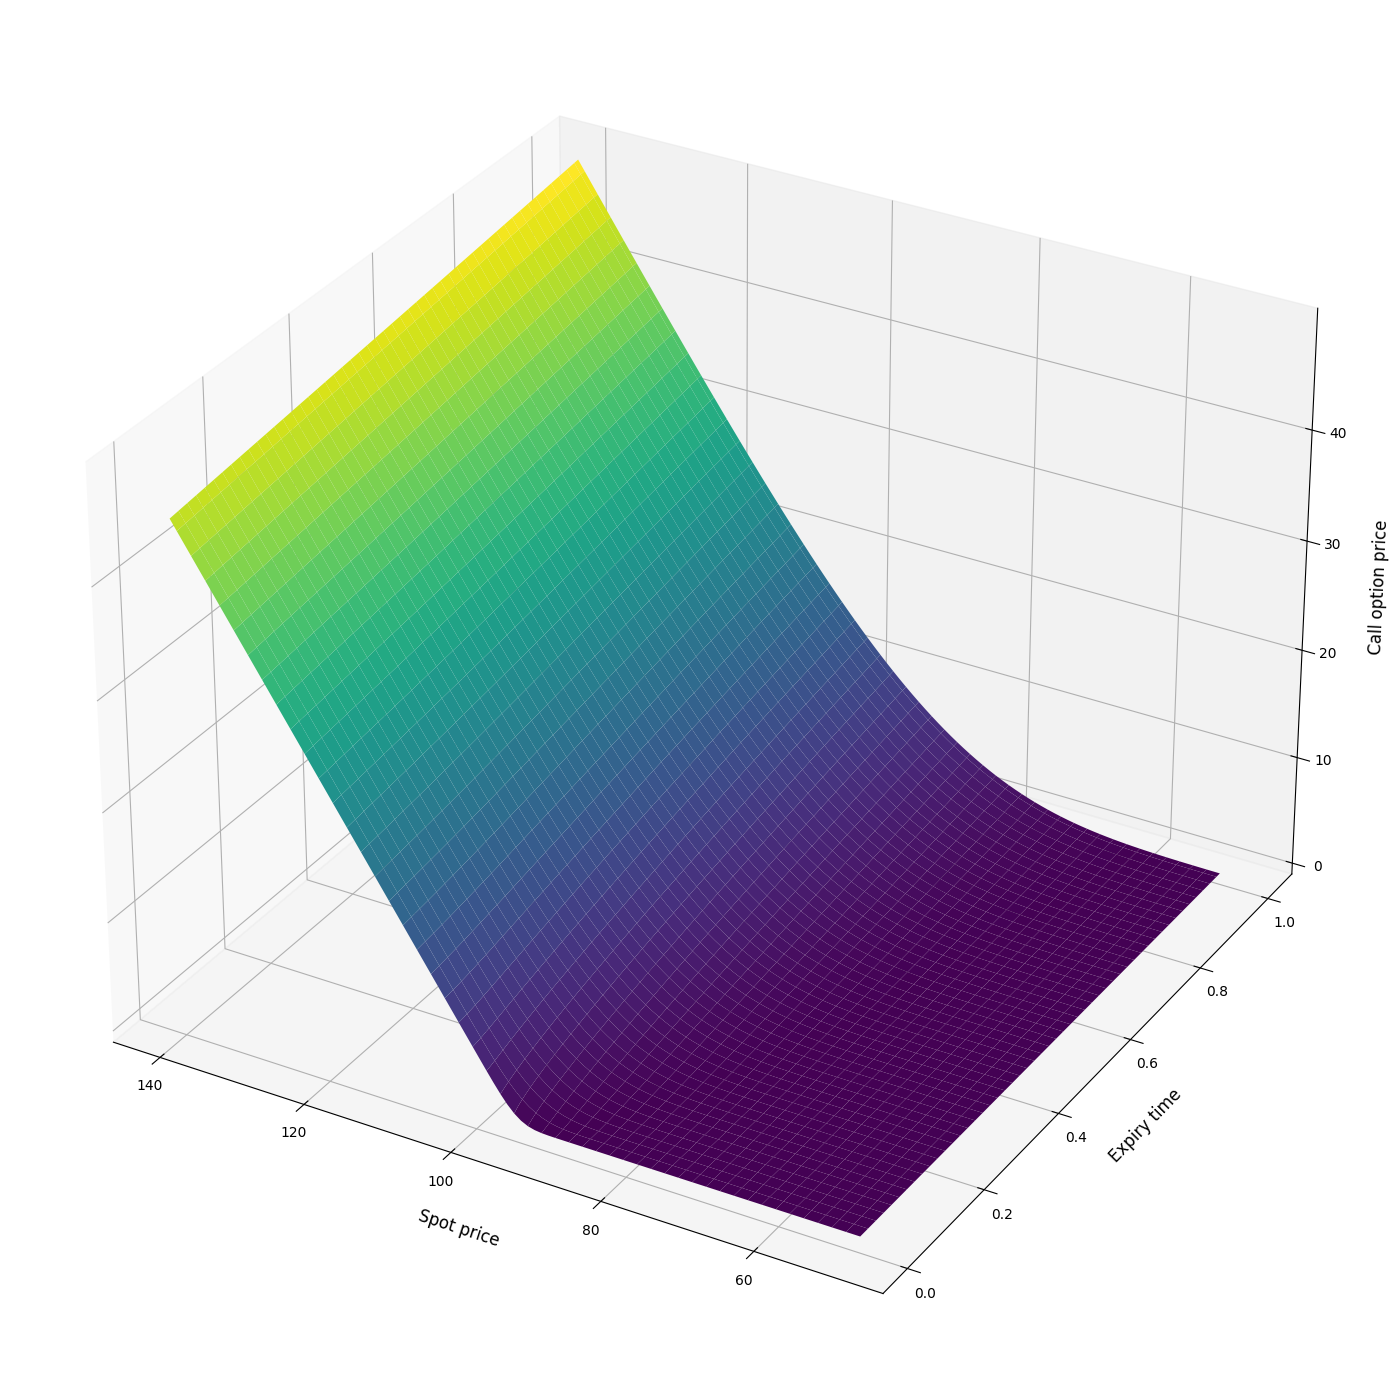

In [307]:
# Parameters
S_vals = np.linspace(50, 140, 100)   # Range of spot prices
T_vals = np.linspace(0.01, 1, 100)   # Range of time to expiry, avoiding T=0 to prevent division by zero
K = 95                              # Strike price
r = 0.05                             # Risk-free rate
sigma = 0.2                          # Volatility

# Black-Scholes call option price function
def black_scholes_call_price(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    return S * Nd1 - K * np.exp(-r * T) * Nd2

# Create grids for S and T
S_grid, T_grid = np.meshgrid(S_vals, T_vals)
C_vals = np.zeros(S_grid.shape)

# Calculate call option prices over the grid
for i in range(S_grid.shape[0]):
    for j in range(S_grid.shape[1]):
        S = S_grid[i, j]
        T = T_grid[i, j]
        C_vals[i, j] = black_scholes_call_price(S, K, r, T, sigma)

# Plot the surface
fig = plt.figure(figsize=(15, 14))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S_grid, T_grid, C_vals, cmap='viridis')

# Set axis labels with formatting
ax.set_xlabel('Spot price', fontsize=12, labelpad=12)
ax.set_ylabel('Expiry time', fontsize=12, labelpad=12)
ax.set_zlabel('Call option price', fontsize=12, labelpad=12)

# Reverse the x-axis to go from 60 (right) to 140 (left)
ax.invert_xaxis()

# Adjust the view angle
ax.view_init(elev=30, azim=-60)

plt.tight_layout()  # Ensure the layout is adjusted to fit labels
plt.show()


### Convergence of European Option Prices for Different Binomial Tree Models

In [308]:
def calculate_option_price(S, X, r, DeltaT, NStep, u, d, p, z):
    OptionValue = np.zeros(NStep + 1)

    # Compute option values at maturity
    for i in range(NStep + 1):
        OptionValue[i] = max(0, z * (S * (u ** i) * (d ** (NStep - i)) - X))

    # Backward induction for option price at time 0
    for j in range(NStep - 1, -1, -1):
        for i in range(j + 1):
            AssetPrice = S * (u ** i) * (d ** (j - i))
            OptionValue[i] = max(
                (p * OptionValue[i + 1] + (1 - p) * OptionValue[i]) * np.exp(-r * DeltaT),
                z * (AssetPrice - X)
            )

    return OptionValue[0]

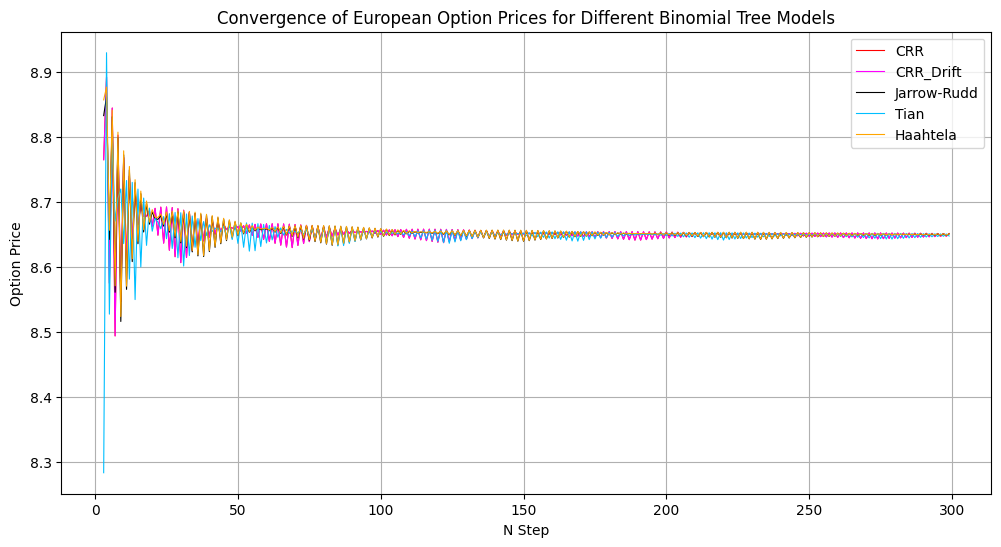

In [309]:
# Parameters
S0 = 100                                 # Initial stock price
K = 95                                   # Strike price
r = 0.01                                 # Risk-free interest rate
q = 0                                    # Dividend yield
b = r - q                                # Cost of carry
T = 0.5                                  # Time to maturity (in years)
sigma = 0.20                             # Volatility
z = 1                                    # -1 for put, 1 for call (call option in this case)
min_step = 3                             # Minimum number of steps in the tree
max_step = 300                           # Maximum number of steps in the tree

# Model types
model_type = ['CRR', 'CRR_Drift', 'Jarrow-Rudd', 'Tian', 'Haahtela']

# Calculate the option prices using the binomial tree for different models
results = {model: [] for model in model_type}

# Loop through each model and calculate the option price for varying steps
for model in model_type:
    for i in range(min_step, max_step):
        DeltaT = T / i
        if model == 'CRR':
            u = np.exp(sigma * np.sqrt(DeltaT))
            d = 1 / u
            p = (np.exp(r * DeltaT) - d) / (u - d)
        elif model == 'CRR_Drift':
            drift = 0
            u = np.exp(sigma * np.sqrt(DeltaT))
            d = 1 / u
            p = (np.exp((r + drift) * DeltaT) - d) / (u - d)
        elif model == 'Jarrow-Rudd':
            u = np.exp((r - q - 0.5 * sigma ** 2) * DeltaT + sigma * np.sqrt(DeltaT))
            d = np.exp((r - q - 0.5 * sigma ** 2) * DeltaT - sigma * np.sqrt(DeltaT))
            p = 0.5
        elif model == 'Tian':
            eta = np.exp(DeltaT * sigma ** 2)
            u = 0.5 * np.exp(r * DeltaT) * eta * (eta + 1 + np.sqrt(eta ** 2 + 2 * eta - 3))
            d = 0.5 * np.exp(r * DeltaT) * eta * (eta + 1 - np.sqrt(eta ** 2 + 2 * eta - 3))
            p = (np.exp(b * DeltaT) - d) / (u - d)
        elif model == 'Haahtela':
            u = np.exp(r * DeltaT) * (1 + np.sqrt(np.exp((sigma ** 2) * DeltaT) - 1))
            d = np.exp(r * DeltaT) * (1 - np.sqrt(np.exp((sigma ** 2) * DeltaT) - 1))
            p = (np.exp((r - q) * DeltaT) - d) / (u - d)
        
        # Calculate and store the option price for the current model and step size
        price = calculate_option_price(S0, K, r, DeltaT, i, u, d, p, z)
        results[model].append(price)

# Plot convergence
plt.figure(figsize=(12, 6))
colors = {
    'CRR': 'red',
    'Jarrow-Rudd': 'black',
    'Tian': 'deepskyblue',
    'CRR_Drift': 'magenta',
    'Haahtela': 'orange'
}

# Plot each model with its respective color and label
for model in model_type:
    plt.plot(range(min_step, max_step), results[model], label=model, color=colors[model], linewidth=0.8)

# Plot the Black-Scholes price as a horizontal line
# plt.axhline(y=EUCRROptionPrice, color='black', linestyle='--', label='Black-Scholes Price')

plt.xlabel("N Step")
plt.ylabel("Option Price")
plt.title("Convergence of European Option Prices for Different Binomial Tree Models")
plt.legend()
plt.grid(True)
plt.show()


### Convergence of American Option Prices for Different Binomial Tree Models

In [310]:
# Function to calculate American option price
def calculate_american_option_price(S, K, r, DeltaT, NStep, u, d, p, z):
    OptionValue = np.zeros(NStep + 1)

    # Compute option values at maturity
    for i in range(NStep + 1):
        OptionValue[i] = max(0, z * (S * (u ** i) * (d ** (NStep - i)) - K))

    # Backward induction for option price at time 0 with early exercise condition
    for j in range(NStep - 1, -1, -1):
        for i in range(j + 1):
            AssetPrice = S * (u ** i) * (d ** (j - i))
            OptionValue[i] = max(
                (p * OptionValue[i + 1] + (1 - p) * OptionValue[i]) * np.exp(-r * DeltaT),
                z * (AssetPrice - K)  # Early exercise condition
            )

    return OptionValue[0]

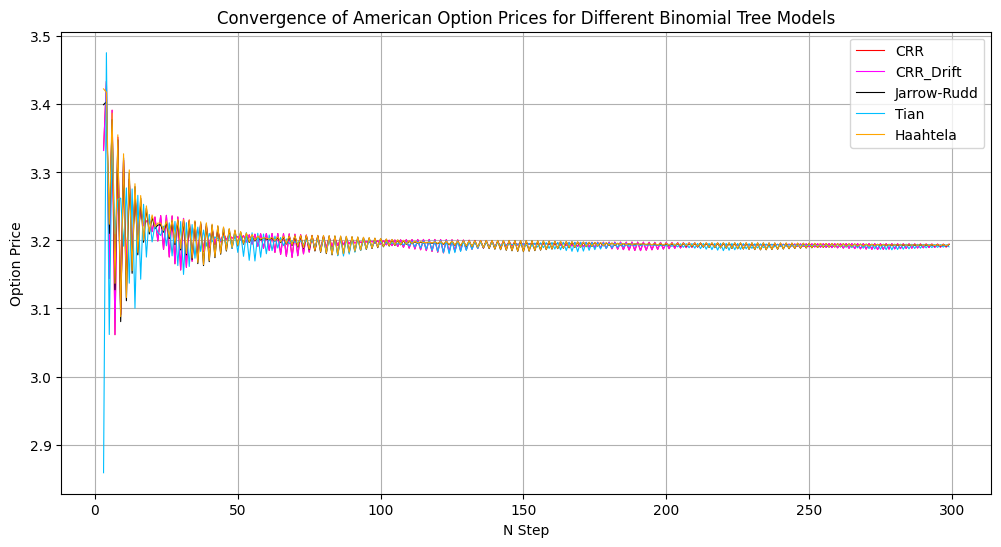

In [311]:
z = -1              # -1 for put, 1 for call

# Calculate the option prices using the binomial tree for different models
results = {model: [] for model in model_type}

# Loop through each model and calculate the option price for varying steps
for model in model_type:
    for i in range(min_step, max_step):
        DeltaT = T / i
        if model == 'CRR':
            u = np.exp(sigma * np.sqrt(DeltaT))
            d = 1 / u
            p = (np.exp(r * DeltaT) - d) / (u - d)
        elif model == 'CRR_Drift':
            drift = 0
            u = np.exp(sigma * np.sqrt(DeltaT))
            d = 1 / u
            p = (np.exp((r + drift) * DeltaT) - d) / (u - d)
        elif model == 'Jarrow-Rudd':
            u = np.exp((r - q - 0.5 * sigma ** 2) * DeltaT + sigma * np.sqrt(DeltaT))
            d = np.exp((r - q - 0.5 * sigma ** 2) * DeltaT - sigma * np.sqrt(DeltaT))
            p = 0.5
        elif model == 'Tian':
            eta = np.exp(DeltaT * sigma ** 2)
            u = 0.5 * np.exp(r * DeltaT) * eta * (eta + 1 + np.sqrt(eta ** 2 + 2 * eta - 3))
            d = 0.5 * np.exp(r * DeltaT) * eta * (eta + 1 - np.sqrt(eta ** 2 + 2 * eta - 3))
            p = (np.exp(b * DeltaT) - d) / (u - d)
        elif model == 'Haahtela':
            u = np.exp(r * DeltaT) * (1 + np.sqrt(np.exp((sigma ** 2) * DeltaT) - 1))
            d = np.exp(r * DeltaT) * (1 - np.sqrt(np.exp((sigma ** 2) * DeltaT) - 1))
            p = (np.exp((r - q) * DeltaT) - d) / (u - d)
        
        # Calculate and store the option price for the current model and step size
        price = calculate_american_option_price(S0, K, r, DeltaT, i, u, d, p, z)
        results[model].append(price)

# Plot convergence
plt.figure(figsize=(12, 6))
colors = {
    'CRR': 'red',
    'Jarrow-Rudd': 'black',
    'Tian': 'deepskyblue',
    'CRR_Drift': 'magenta',
    'Haahtela': 'orange'
}

# Plot each model with its respective color and label
for model in model_type:
    plt.plot(range(min_step, max_step), results[model], label=model, color=colors[model], linewidth=0.8)

# Plot the Black-Scholes price as a horizontal line
# plt.axhline(y=AMCRROptionPrice, color='black', linestyle='--', label='Black-Scholes Price')

plt.xlabel("N Step")
plt.ylabel("Option Price")
plt.title("Convergence of American Option Prices for Different Binomial Tree Models")
plt.legend()
plt.grid(True)
plt.show()
